<a href="https://colab.research.google.com/github/seifahmed2004/ML-Project/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv("/content/mhealth_raw_data.csv")
df
# !kaggle datasets download -d gaurav2022/mobile-health


# !unzip mobile-health.zip


# df = pd.read_csv('mhealth_raw_data.csv')

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.449020,-1.01030,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.449020,-1.01030,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.449020,-1.01030,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.456860,-1.00820,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.456860,-1.00820,0.025862,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215740,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-3.7198,-8.9071,0.294230,0.041176,-0.99384,-0.480600,0,subject10
1215741,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-3.7160,-8.7455,0.448140,0.041176,-0.99384,-0.480600,0,subject10
1215742,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-3.8824,-9.1155,0.450480,0.041176,-0.99384,-0.480600,0,subject10
1215743,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-3.5564,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0,subject10


In [3]:
df_subset = df.iloc[50000:50100]
print(df_subset)

          alx     aly      alz      glx      gly      glz     arx     ary  \
50000  2.2716 -9.3919  0.41771 -0.34508 -0.78049  0.36149 -3.6387 -9.2130   
50001  2.1813 -9.5103  0.45255 -0.34508 -0.78049  0.36149 -3.8422 -9.1820   
50002  2.1922 -9.5296  0.50377 -0.34508 -0.78049  0.36149 -3.8927 -9.2516   
50003  2.3170 -9.6572  0.61322 -0.34508 -0.78049  0.36149 -3.9181 -9.2432   
50004  2.2754 -9.6680  0.52894 -0.34508 -0.78049  0.36149 -4.0132 -9.1817   
...       ...     ...      ...      ...      ...      ...     ...     ...   
50095  2.2541 -9.3989  0.70885 -0.35436 -0.77861  0.36739 -3.0236 -9.2480   
50096  2.2835 -9.4602  0.51858 -0.35436 -0.77861  0.36739 -3.0167 -9.3067   
50097  2.1406 -9.4402  0.53898 -0.35436 -0.77861  0.36739 -3.1062 -9.1375   
50098  2.4484 -9.6385  0.51131 -0.35250 -0.79362  0.36739 -2.9521 -9.1388   
50099  2.2549 -9.7281  0.45281 -0.35250 -0.79362  0.36739 -2.8313 -9.0959   

          arz      grx      gry       grz  Activity   subject  
50000  1.69

<Axes: >

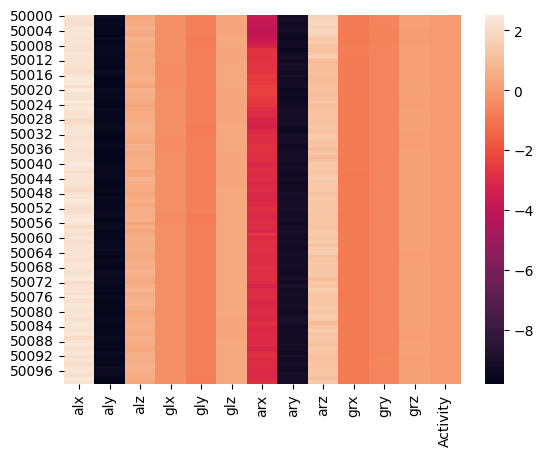

In [4]:
import seaborn as sns
X = df_subset.drop('subject',axis=1)
sns.heatmap(X)


Sample data points:
      alx     aly      alz       glx      gly      glz     arx     ary  \
0  2.1849 -9.6967  0.63077  0.103900 -0.84053 -0.68762 -8.6499 -4.5781   
1  2.3876 -9.5080  0.68389  0.085343 -0.83865 -0.68369 -8.6275 -4.3198   
2  2.4086 -9.5674  0.68113  0.085343 -0.83865 -0.68369 -8.5055 -4.2772   
3  2.1814 -9.4301  0.55031  0.085343 -0.83865 -0.68369 -8.6279 -4.3163   
4  2.4173 -9.3889  0.71098  0.085343 -0.83865 -0.68369 -8.7008 -4.1459   

        arz      grx     gry       grz  Activity   subject  
0  0.187760 -0.44902 -1.0103  0.034483         0  subject1  
1  0.023595 -0.44902 -1.0103  0.034483         0  subject1  
2  0.275720 -0.44902 -1.0103  0.034483         0  subject1  
3  0.367520 -0.45686 -1.0082  0.025862         0  subject1  
4  0.407290 -0.45686 -1.0082  0.025862         0  subject1  


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


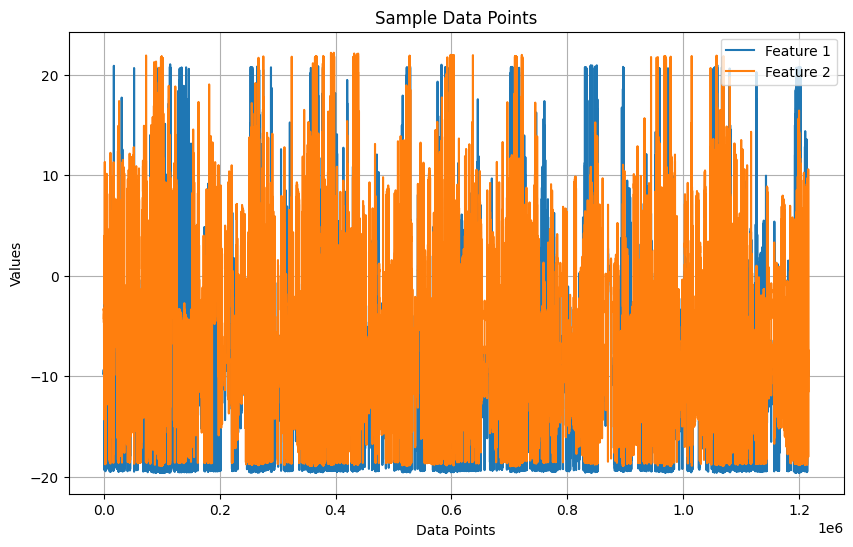

In [5]:
#Visualization of sample data points
print("Sample data points:")
print(df.head())
plt.figure(figsize=(10, 6))

plt.plot(df['aly'], label='Feature 1')
plt.plot(df['ary'], label='Feature 2')

plt.title('Sample Data Points')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle = True, random_state=0)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)


X_test = np.asarray(X_test)
y_test = np.asarray(y_test)


In [8]:
X.head()


,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0


In [9]:
y.head()

0    subject1
1    subject1
2    subject1
3    subject1
4    subject1
Name: subject, dtype: object

In [10]:
df_no_duplicates = df.drop_duplicates()
print("Original DataFrame shape:", df.shape)
print("DataFrame shape after removing duplicates:", df_no_duplicates.shape)

Original DataFrame shape: (1215745, 14)
DataFrame shape after removing duplicates: (1215745, 14)


In [11]:
print (f"training set size: {X_train.shape[0]} samples \ntest set size: {X_test.shape[0]} samples ")

training set size: 972596 samples 
test set size: 243149 samples 


In [12]:
from collections import Counter
from sklearn.metrics import accuracy_score

In [13]:
X_train = pd.DataFrame(X_train)
X_train = X_train.dropna()
y_train = pd.DataFrame(y_train)
y_train = y_train.dropna()

In [14]:
#https://www.geeksforgeeks.org/k-nearest-neighbor-algorithm-in-python/

from sklearn.neighbors import KNeighborsClassifier

# Create an instance of KNeighborsClassifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model using your training data
knn.fit(X_train, y_train)

# Make predictions on the test data
predictions = knn.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [15]:
knn

KNeighborsClassifier(n_neighbors=3)

In [16]:
class svm_hard_margin:

  weights = []
  bias = 0

  def fit(self, x, y, learning_rate, epochs):
    n_samples, n_features = x.shape
    self.weights = np.zeros(n_features)

    for epoch in range(1, epochs + 1):
        for j in range(n_samples):
            condition = y[j] * (np.dot(x[j], self.weights) + self.bias) >= 1
            if not condition:
                # Misclassification, update weights and bias
                self.weights += learning_rate * (x[j] * y[j] - 2 * 1/epoch * self.weights)
                self.bias += learning_rate * y[j]

  def predict(self, x):
    predictions = np.dot(x, self.weights) + self.bias
    predictions = np.sign(predictions)
    return predictions

In [17]:
# from sklearn.svm import SVC
# y_train = y_train[:316684]
# svm = SVC(C=10, kernel='rbf')
# svm.fit(X_train, y_train)

In [18]:
# plot_decision_regions(X_train, y_train, clf=svm, legend=2)

# plt.title('SVM')
# plt.show()

In [19]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [20]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3, random_state=1)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5, random_state=1)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(851021, 13) (182362, 13) (182362, 13) (851021,) (182362,) (182362,)


In [21]:
1022/32

31.9375

In [22]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense #makes summation, activation
import matplotlib.pyplot as plt
from keras.optimizers import SGD, Adam

In [23]:
model = Sequential([
    Dense(10, activation='relu', input_shape=(10,)), #vector
    Dense(5, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [24]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [46]:
import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data (these are NumPy arrays)
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]


In [47]:
from keras import layers

inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = layers.Dense(64, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation="softmax", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

print("Fit model on training data")


Fit model on training data


In [48]:
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=2,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_val, y_val),
)


Epoch 1/2
782/782 [==============================] - 3s 3ms/step - loss: 0.3543 - accuracy: 0.9005 - val_loss: 0.1807 - val_accuracy: 0.9476
Epoch 2/2
782/782 [==============================] - 3s 3ms/step - loss: 0.1477 - accuracy: 0.9552 - val_loss: 0.1285 - val_accuracy: 0.9641


In [30]:
from sklearn.model_selection import train_test_split

# Assuming you have your input data X and target data y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print("Training set shapes - X_train: {}, y_train: {}".format(X_train.shape, y_train.shape))
print("Testing set shapes - X_test: {}, y_test: {}".format(X_test.shape, y_test.shape))


Training set shapes - X_train: (972596, 13), y_train: (972596,)
Testing set shapes - X_test: (243149, 13), y_test: (243149,)


In [31]:
X_test_adj = X_test[:5000]
y_test_adj = y_test[:5000]

In [32]:
# model.evaluate(X_test_adj, y_test_adj)

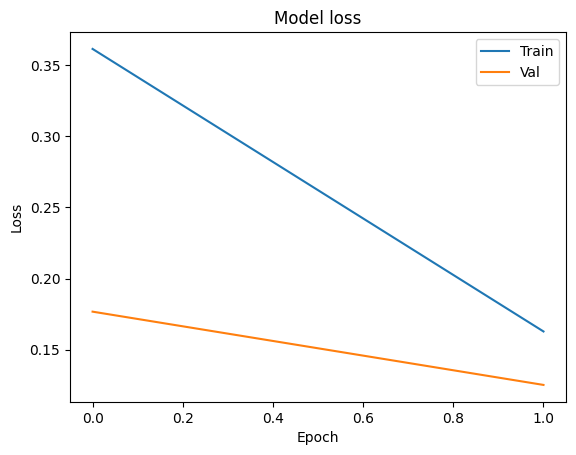

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

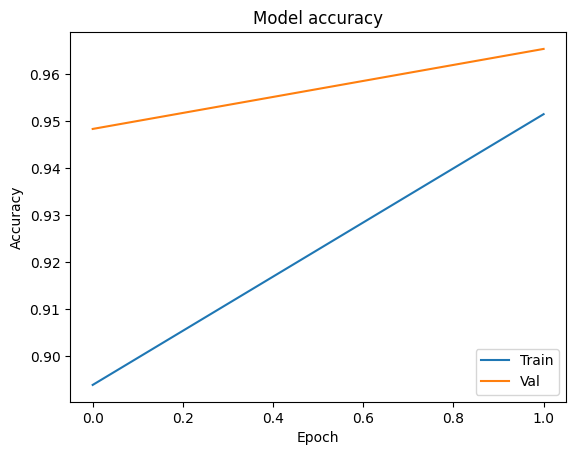

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [35]:
#Define sigmoid function
def sigmoid(z):
    #output > 0.5 when z is positive
    #output < 0.5 when z is negative
    return 1/(1+np.exp(-z)) # Output in range [0,1]

In [36]:
x= np.arange(-20,20)
y= np.round(sigmoid(x),2)

Text(0, 0.5, 'Logistic/sigmoid function applied')

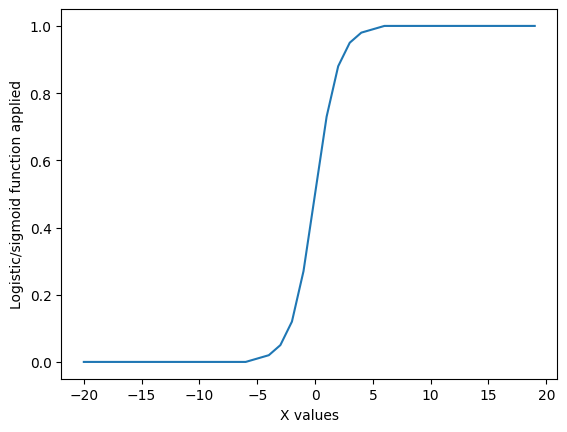

In [37]:
plt.plot(x, y)
plt.xlabel('X values')
plt.ylabel('Logistic/sigmoid function applied')

In [38]:
df.isna().sum()

alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64

In [39]:
df.duplicated().sum()

0

In [40]:
df['alx'].value_counts()

alx
 19.59600    324
 19.58600    287
 19.57500    209
 19.60600    182
 19.56500     82
            ... 
 7.36230       1
-2.93850       1
-9.24390       1
 0.74650       1
 0.99736       1
Name: count, Length: 320576, dtype: int64

In [41]:
X = df.drop('subject',axis=1)
y = df['subject']
# Convert all columns in X to integers
# X = X.astype(int)

# # Convert y to integers
# y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101, shuffle=True)
X_train = pd.DataFrame(X_train)
X_train = X_train.dropna()
y_train = pd.DataFrame(y_train)
y_train = y_train.dropna()

In [42]:
clf = LogisticRegression()
clf.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
y_pred=clf.predict(X_test)
y_pred

array(['subject1', 'subject7', 'subject7', ..., 'subject10', 'subject1',
       'subject5'], dtype=object)

In [63]:
print(accuracy_score(y_test,y_pred))

0.0


In [65]:
# Convert labels to the same type if necessary
y_test = y_test.astype(str)
y_pred = y_pred.astype(str)

# Now you can calculate the confusion matrix
confusion_matrix(y_test, y_pred)


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 202, 111, 109,
         47, 130,  30,  37, 138,  95,  81],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 206, 131, 116,
         47, 157,  60,  56, 143, 119, 100],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 213, 129, 113,
         48, 136,  40,  56, 131,  81,  85],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 191, 109, 102,
         48, 153,  40,  52, 132,  99,  84],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 197, 107, 102,
         42, 149,  47,  58, 120,  81,  79],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 175, 103, 104,
         47, 113,  36,  44, 113,  89,  68],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 189, 111,  93,
         40, 145,  42,  40, 125,  93,  80],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 206, 123, 105,
         41, 128,  35,  53, 128, 123,  86],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 177, 1

In [ ]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=df['subject'], yticklabels= df['subject'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [90]:
import numpy as np
import pandas as pd
import itertools

from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison
import seaborn as sns

from tqdm.notebook import tqdm_notebook as tqdm

from sklearn.svm import SVC


In [91]:
X = df[['aly', 'ary']].values
y = df['subject'].values

X, y = shuffle_arrays_unison(arrays=[X, y], random_seed=42)

scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)
X_train, y_train = X[:100], y[:100]
X_test, y_test = X[100:], y[100:]


In [92]:
# clf = svm.SVC(kernel='linear', C=1, random_state=42)
# scores = cross_val_score(clf, X, y, cv=5)
# scores

In [102]:
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sklearn.linear_model as skl_lm


In [101]:
np.random.seed(seed=12)
train = np.random.choice([True, False], size = len(y), replace = True)
test = np.invert(train)

In [103]:
auto_data = pd.read_csv('/content/mhealth_raw_data.csv', na_values='?').dropna()
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215745 entries, 0 to 1215744
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   alx       1215745 non-null  float64
 1   aly       1215745 non-null  float64
 2   alz       1215745 non-null  float64
 3   glx       1215745 non-null  float64
 4   gly       1215745 non-null  float64
 5   glz       1215745 non-null  float64
 6   arx       1215745 non-null  float64
 7   ary       1215745 non-null  float64
 8   arz       1215745 non-null  float64
 9   grx       1215745 non-null  float64
 10  gry       1215745 non-null  float64
 11  grz       1215745 non-null  float64
 12  Activity  1215745 non-null  int64  
 13  subject   1215745 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 129.9+ MB


In [104]:
auto_data.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0,subject1


In [105]:
auto_data.describe()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
count,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06
mean,1.494200e+00,-9.692878e+00,-9.548056e-01,-1.598951e-03,-6.166318e-01,-1.587811e-01,-3.713413e+00,-5.805526e+00,2.393880e+00,-2.761061e-01,-4.664340e-01,2.666335e-01,1.741465e+00
std,3.826485e+00,4.171303e+00,5.461803e+00,4.912172e-01,3.546406e-01,5.467979e-01,4.763586e+00,5.757639e+00,3.876503e+00,5.276888e-01,5.555510e-01,5.643804e-01,3.283679e+00
min,-2.214600e+01,-1.961900e+01,-1.937300e+01,-2.146600e+00,-7.789900e+00,-2.626700e+00,-2.236100e+01,-1.897200e+01,-1.823900e+01,-8.339200e+00,-3.570800e+00,-2.689700e+00,0.000000e+00
25%,1.413100e-01,-1.020100e+01,-2.649400e+00,-4.359900e-01,-8.180100e-01,-5.933200e-01,-6.076000e+00,-9.404200e+00,1.296500e-01,-7.058800e-01,-8.973300e-01,-2.370700e-01,0.000000e+00
50%,1.308900e+00,-9.670300e+00,-1.645600e-02,-1.484200e-02,-7.073200e-01,-1.905700e-01,-2.977600e+00,-7.461500e+00,1.928100e+00,-3.549000e-01,-6.345000e-01,3.017200e-01,0.000000e+00
75%,2.575800e+00,-9.042200e+00,1.301300e+00,4.489800e-01,-5.403400e-01,3.222000e-01,-1.193700e+00,-2.533900e+00,4.914700e+00,9.607800e-02,-1.067800e-01,7.780200e-01,2.000000e+00
max,2.005400e+01,2.116100e+01,2.501500e+01,6.048400e+01,2.011300e+00,2.770100e+00,1.986400e+01,2.219100e+01,2.574100e+01,3.319600e+00,1.556500e+00,2.750000e+00,1.200000e+01


In [107]:
train_df = auto_data.sample(196, random_state = 1) # split the data into two halfs # random_state to get the same result every time
val_df = auto_data[~auto_data.isin(train_df)].dropna(how = 'all')

X_train = train_df['alx'].values.reshape(-1,1)
y_train = train_df['aly']
X_val = val_df['alz'].values.reshape(-1,1)
y_val = val_df['glx']

In [108]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Linear
lm = skl_lm.LinearRegression()

model = lm.fit(X_train, y_train)
print(mean_squared_error(y_val, model.predict(X_val)))

# Quadratic
poly = PolynomialFeatures(degree=2)
X_train2 = poly.fit_transform(X_train)
X_val2 = poly.fit_transform(X_val)

model = lm.fit(X_train2, y_train)
print(mean_squared_error(y_val, model.predict(X_val2)))

# Cubic
poly = PolynomialFeatures(degree=3)
X_train3 = poly.fit_transform(X_train)
X_val3 = poly.fit_transform(X_val)

model = lm.fit(X_train3, y_train)
print(mean_squared_error(y_val, model.predict(X_val3)))

90.26304073144514
95.51983838745835
105.56308996776153


In [110]:
train_df = auto_data.sample(196, random_state = 2) # split the data into two halfs # random_state to get the same result every time
val_df = auto_data[~auto_data.isin(train_df)].dropna(how = 'all')

X_train = train_df['alx'].values.reshape(-1,1)
y_train = train_df['aly']
X_val = val_df['alz'].values.reshape(-1,1)
y_val = val_df['glx']

model = lm.fit(X_train, y_train)
print(mean_squared_error(y_val, model.predict(X_val)))

# Quadratic
poly = PolynomialFeatures(degree=2)
X_train2 = poly.fit_transform(X_train)
X_val2 = poly.fit_transform(X_val)

model = lm.fit(X_train2, y_train)
print(mean_squared_error(y_val, model.predict(X_val2)))

# Cubic
poly = PolynomialFeatures(degree=3)
X_train3 = poly.fit_transform(X_train)
X_val3 = poly.fit_transform(X_val)

model = lm.fit(X_train3, y_train)
print(mean_squared_error(y_val, model.predict(X_val3)))

88.07690244889599
88.7671597647046
104.79548023263176


In [114]:
#Leave-One-Out Cross-Validation (LOOCV)
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

X = auto_data['alx'].values.reshape(-1,1)
y = auto_data['aly'].values.reshape(-1,1)

# making n_splits = # of entries make the cross_val_score use only one entry for testing and the rest for training (LOOCV)
crossvalidation = KFold(n_splits=392, random_state=None, shuffle=False)

# cross validation scores : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
scores = cross_val_score(lm, X, y, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)

#print(scores)
print("Folds: " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))


Folds: 392, MSE: 17.432586519337843, STD: 22.115207908


In [113]:
for i in range(1,6):
    poly = PolynomialFeatures(degree=i)
    X_current = poly.fit_transform(X)
    scores = cross_val_score(lm, X_current, y, scoring="neg_mean_squared_error", cv=crossvalidation,n_jobs=1)
    print("Degree-"+str(i)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

Degree-1 polynomial MSE: 17.432586519337846, STD: 22.115207908
Degree-2 polynomial MSE: 17.177766424492606, STD: 22.07046840607775
Degree-3 polynomial MSE: 17.118308921171778, STD: 21.62853992554251
Degree-4 polynomial MSE: 17.01429987929573, STD: 21.7886698243346
Degree-5 polynomial MSE: 16.955829641926716, STD: 21.521883691852263


In [ ]:
#k-Fold Cross-Validation
crossvalidation = KFold(n_splits=10, random_state=None, shuffle=False)

for i in range(1,11):
    poly = PolynomialFeatures(degree=i)
    X_current = poly.fit_transform(X)
    scores = cross_val_score(lm, X_current, y, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)
    print("Degree-"+str(i)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))